<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/p1/Dogs%20Vs%20Cats%20Filtered%20dataset%206%20models%20(working%20but%20rough).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**IMPORTING THE LIBRARIES**##

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

## **PREPARING THE DATASET**

**Fetching data set from Google Drive and Unzip it**

In [0]:
import os
import zipfile

local_zip = '/content/drive/My Drive/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

**Setting up the Directories**

In [0]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')



In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

**Checking the image format - Channels-width-hight or  width-height-channels**

In [0]:
if K.image_data_format() == 'channels_first':
  input_shape = (3, 224, 224)
else:
  input_shape = (224, 224, 3)

**Generating the images using image data generator**

In [11]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator

training_data_generation = ImageDataGenerator(
    rotation_range=90,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
    zoom_range=0.4)

test_data_generation = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 32 using train_datagen generator
train_generator = training_data_generation.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = test_data_generation.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


##**VISUALIZATION**##

**Assigning the images and labels to process further for identification**

In [0]:
test_images, test_labels = next(validation_generator)
#imgs, labels = next(train_generator)

**Visualizing the Dataset**

In [0]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
0.0  random images from the training dataset


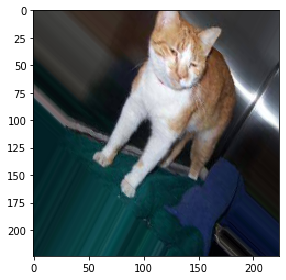

1.0  random images from the training dataset


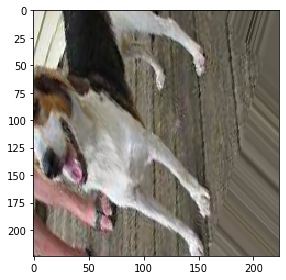

1.0  random images from the training dataset


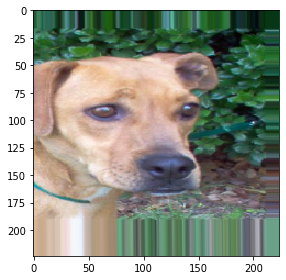

0.0  random images from the training dataset


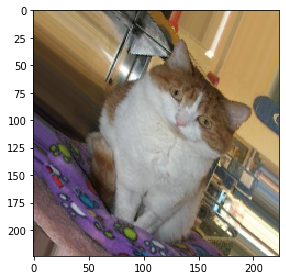

1.0  random images from the training dataset


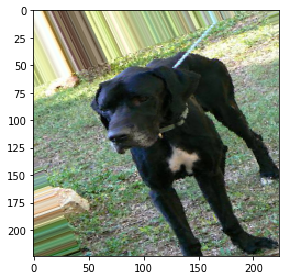

1.0  random images from the training dataset


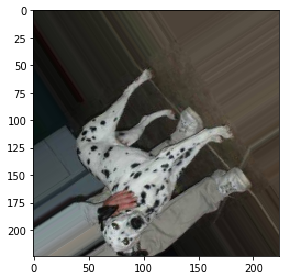

0.0  random images from the training dataset


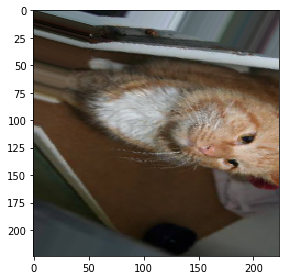

1.0  random images from the training dataset


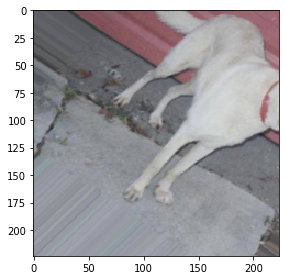

0.0  random images from the training dataset


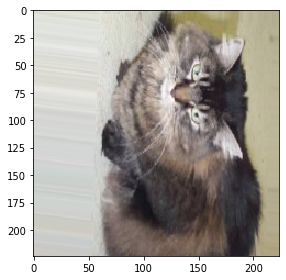

0.0  random images from the training dataset


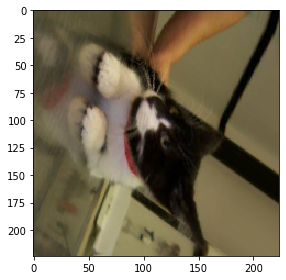

0.0  random images from the training dataset


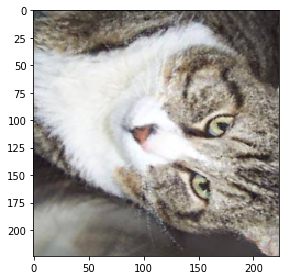

0.0  random images from the training dataset


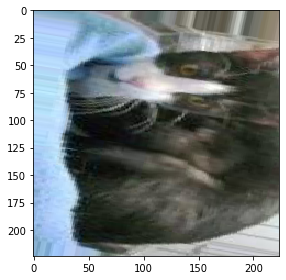

0.0  random images from the training dataset


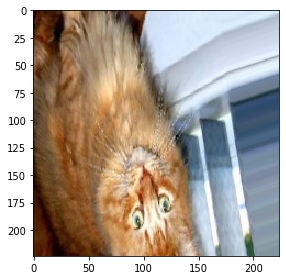

0.0  random images from the training dataset


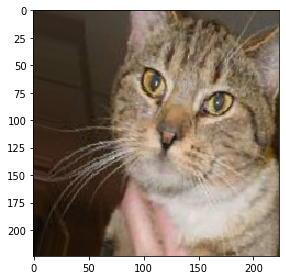

1.0  random images from the training dataset


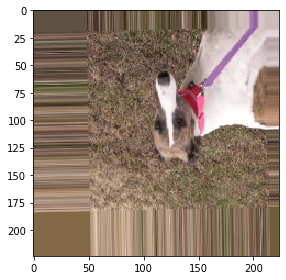

0.0  random images from the training dataset


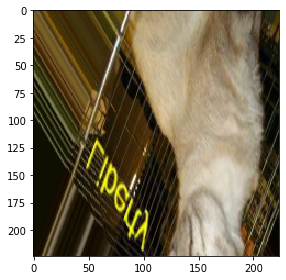

1.0  random images from the training dataset


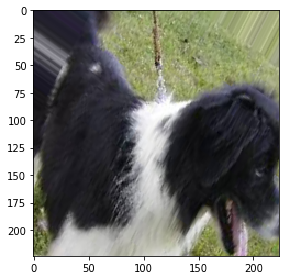

1.0  random images from the training dataset


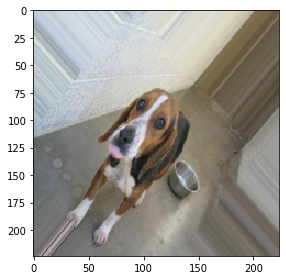

1.0  random images from the training dataset


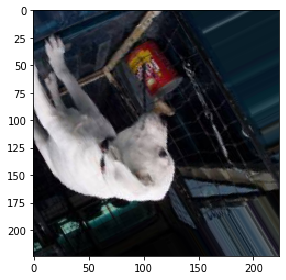

1.0  random images from the training dataset


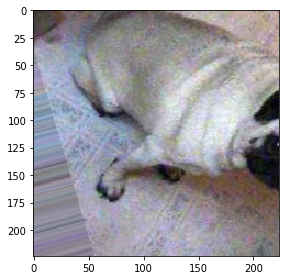

In [15]:
train_images,train_labels = train_generator.next()

print(len(train_images))
for i in range(0,len(train_images)):
    image = train_images[i]
    print(train_labels[i], " random images from the training dataset")
    imshow(image)

**Visualizing the effect of DataGeneration, various changes in a single images are clearly vivible**

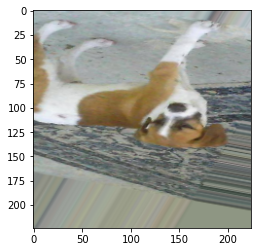

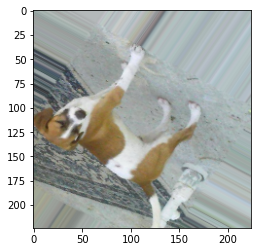

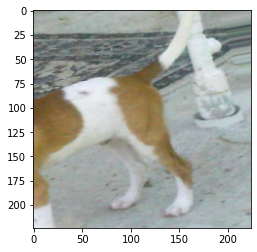

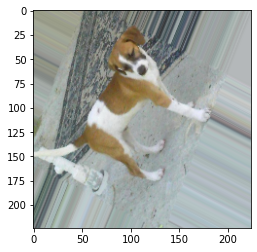

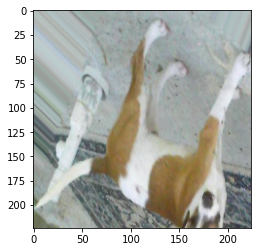

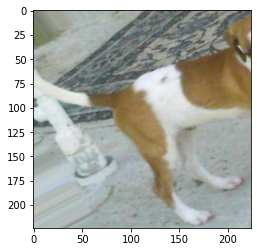

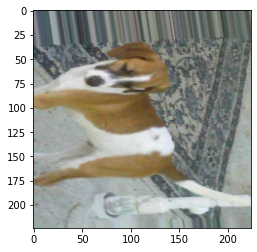

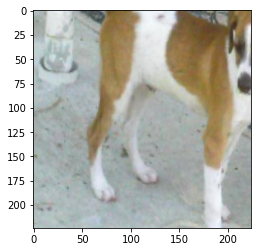

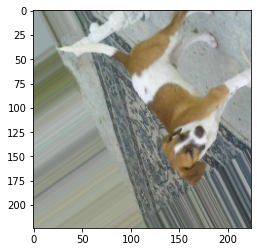

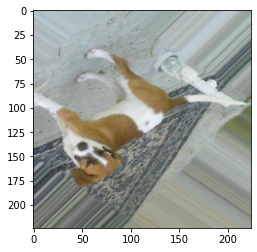

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_dogs_dir, train_dog_fnames[0])
img = load_img(img_path, target_size=(224, 224))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (224, 224, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 224, 224, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in training_data_generation.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 10 == 0:
    break

## **PREPARING THE VGG16 MODEL**

In [0]:
from time import time


In [0]:
#BASE_MODEL = 'VGG16'
from keras.preprocessing.image import ImageDataGenerator

def transfer_learning(BASE_MODEL):
  if BASE_MODEL=='VGG16':
      from keras.applications.vgg16 import VGG16 as PTModel, preprocess_input
  elif BASE_MODEL=='vgg19':
      from keras.applications.vgg19 import VGG19 as PTModel, preprocess_input
  elif BASE_MODEL=='ResNet50':
      from keras.applications.resnet50 import ResNet50 as PTModel, preprocess_input
  elif BASE_MODEL=='InceptionV3':
      from keras.applications.inception_v3 import InceptionV3 as PTModel, preprocess_input
  elif BASE_MODEL=='Xception':
      from keras.applications.xception import Xception as PTModel, preprocess_input
  elif BASE_MODEL=='DenseNet169': 
      from keras.applications.densenet import DenseNet169 as PTModel, preprocess_input
  elif BASE_MODEL=='DenseNet121':
      from keras.applications.densenet import DenseNet121 as PTModel, preprocess_input
  else:
      raise ValueError('Unknown model: {}'.format(BASE_MODEL))
  
  #import keras
  tf.keras.backend.set_learning_phase(1)
  
  check_point_name = BASE_MODEL + '.model'
  model_weights = BASE_MODEL + '.h5'


  # Adding rescale, rotation_range, width_shift_range, height_shift_range,
  # shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
'''
  training_data_generation = ImageDataGenerator(
      rotation_range=90,
      shear_range=0.2,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      rescale=1/255,
      zoom_range=0.4)

  test_data_generation = ImageDataGenerator(rescale=1/255)


  # Flow training images in batches of 32 using train_datagen generator
  train_generator = training_data_generation.flow_from_directory(
          train_dir,  # This is the source directory for training images
          target_size=(224, 224),  # All images will be resized to 150x150
          batch_size=20,
          # Since we use binary_crossentropy loss, we need binary labels
          class_mode='binary')

  # Flow validation images in batches of 32 using val_datagen generator
  validation_generator = test_data_generation.flow_from_directory(
          validation_dir,
          target_size=(224, 224),
          batch_size=20,
          class_mode='binary')
      
'''
  img_rows, img_cols, img_channel = 224, 224, 3
  base_model = PTModel(weights='imagenet'
                     ,include_top=False, input_shape=(img_rows, img_cols, img_channel), classes = 2)

  headModel = baseModel.output
  #headModel = tf.keras.AveragePooling2D(pool_size=(4, 4))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  #headModel = Dropout(0.5)(headModel)

  headModel = Dense(2, activation="softmax")(headModel)

  model = Model(inputs=baseModel.input, outputs=headModel)

  for layer in baseModel.layers:
    layer.trainable = False


  # compile our model (this needs to be done after our setting our
  # layers to being non-trainable)
  print("[INFO] compiling model...")
  opt = tf.keras.optimizers.Adam(lr=1e-4)
  model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

  start_time = time()



  history = model.fit_generator(
        train_generator,
        steps_per_epoch=1,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
  print('time taken ',time()-start_time)


In [56]:
transfer_learning('VGG16')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
[INFO] compiling model...
1/1 [==============================] - 103s 103s/step - loss: 0.7135 - accuracy: 0.4500 - val_loss: 0.7384 - val_accuracy: 0.4800
time taken  114.1566948890686


In [57]:
transfer_learning('vgg19')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
80142336/80134624 [==============================] - 1s 0us/step
[INFO] compiling model...
1/1 [==============================] - 99s 99s/step - loss: 0.7360 - accuracy: 0.6000 - val_loss: 1.9725 - val_accuracy: 0.5200
time taken  110.24601364135742


In [58]:
transfer_learning('ResNet50')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
[INFO] compiling model...
1/1 [==============================] - 99s 99s/step - loss: 0.7099 - accuracy: 0.5500 - val_loss: 0.9404 - val_accuracy: 0.4900
time taken  110.38025879859924


In [59]:
transfer_learning('InceptionV3')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
87916544/87910968 [==============================] - 1s 0us/step
[INFO] compiling model...
1/1 [==============================] - 99s 99s/step - loss: 0.7350 - accuracy: 0.4000 - val_loss: 1.8349 - val_accuracy: 0.4850
time taken  110.11822605133057


In [60]:
transfer_learning('Xception')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
83689472/83683744 [==============================] - 1s 0us/step
[INFO] compiling model...
1/1 [==============================] - 99s 99s/step - loss: 0.7847 - accuracy: 0.4500 - val_loss: 1.5186 - val_accuracy: 0.4750
time taken  109.9391450881958


In [61]:
transfer_learning('DenseNet169')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
51879936/51877672 [==============================] - 0s 0us/step
[INFO] compiling model...
1/1 [==============================] - 101s 101s/step - loss: 1.3200 - accuracy: 0.6000 - val_loss: 0.7417 - val_accuracy: 0.5150
time taken  112.29759073257446


In [67]:
model1 = transfer_learning('DenseNet121')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
[INFO] compiling model...
1/1 [==============================] - 99s 99s/step - loss: 0.8546 - accuracy: 0.6000 - val_loss: 1.3268 - val_accuracy: 0.5050
time taken  110.89603185653687


**Saving the weights & model**

In [0]:
model.save_weights("dogs-cats-try1.h5")

## **Prediction**
 

**Selecting 1 image to verify the working of model**

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

**Loading the image in Keras and Resize it according to the model**

In [0]:
pic = load_img('/content/dog.jpg', target_size= (224,224))
pic_array = img_to_array(pic)

**Comverting the image into Tensor**

In [65]:
pic_array = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
pic_array.shape

(1, 224, 224, 3)

**Testing the single uploaded image & Verify the result**

In [69]:
result1 = model1.predict(pic_array)
print(pic_array)
#plt.show(pic_array)
if result[0][0] ==1:
  prediction = "This is a Dog"
else:
  prediction = "This is a Cat"
print(prediction)

AttributeError: ignored

##**Analysis of the model - Checking Accuracies**##

**Accuracy & Loss Graphs**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


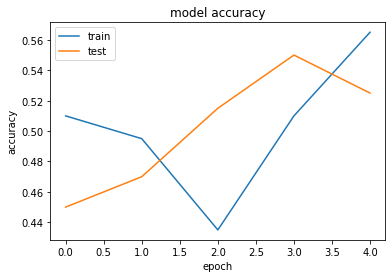

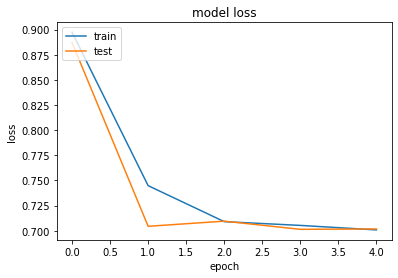

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()